<a href="https://colab.research.google.com/github/DariaSpcpu/R/blob/main/dz4_SmetaninaDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 4

Тема: использование основных статистических тестов и поправок на множественные сравнения.

Цель: разберем использование основных параметрических и непараметрических статистических тестов, научимся вводить поправки на множественные сравнения и поймем, чем они отличаются.



### Задание 1 (2 балла)

Рассмотрите следующую статистическую гипотезу.

Проводят некоторое исследование пациентов с артериальной гипертензией. Предположим, что внедрение нового препарата в среднем лучше снижает их давление по сравнению со стандартной терапией.

Задайте seed для воспроизводимости результатов (функция set.seed()). Задайте размер выборки sample_size <- 30. Задайте значение среднего артериального давления до приема нового препарата и после.



Затем:

- Сформулируйте нулевую и альтернативную гипотезы.
- Определите уровень значимости.
- Выберите статистический тест для проверки гипотезы и аргументируйте свой выбор.
- Определите наблюдаемое значение статистики, а также критическое значение статистики.
- Оцените и прокомментируйте статистическую значимость.


Формулировка гипотез

- Нулевая гипотеза (H0): Новый препарат не отличается по эффективности в снижении артериального давления от стандартной терапии. Это означает, что разница в средних артериальных давлениях до и после приема нового препарата равна 0.
- Альтернативная гипотеза (H1): Новый препарат более эффективен в снижении артериального давления по сравнению со стандартной терапией, т.е. среднее артериальное давление после приема нового препарата ниже.

Уровень значимости

Уровень значимости (α) — это порог, по которому мы решаем, достаточно ли сильно наши данные противоречат нулевой гипотезе. Чаще всего используют α=0.05, что означает 5% риск ошибки первого рода (отвергнуть нулевую гипотезу, когда она верна).



In [4]:
# Устанавливаем seed для воспроизводимости результатов
set.seed(40)

# Задаем размер выборки
sample_size <- 30

# Задаем среднее артериальное давление до и стандартное отклонение
mean_before <- 140  # предполагаемое среднее значение артериального давления до
std_dev <- 10  # стандартное отклонение

# Генерируем выборку давления до приема нового препарата
pressure_before <- rnorm(sample_size, mean_before, std_dev)

# Предполагаем, что препарат снижает давление в среднем на 5 единиц со стандартным отклонением 5
effect <- -5  # среднее снижение давления
effect_std_dev <- 5  # стандартное отклонение эффекта

# Генерируем эффект от нового препарата и создаем выборку после приема препарата
effect_samples <- rnorm(sample_size, effect, effect_std_dev)
pressure_after <- pressure_before + effect_samples




Перед проведением парного t-теста проверим выборки на нормальность распределения, поскольку t-тест предполагает, что разности между парами наблюдений распределены нормально. Это поможет убедиться, что использование параметрических методов, таких как t-тест, является обоснованным.

In [2]:
# Вычисляем разности между парами наблюдений
differences <- pressure_after - pressure_before

# Проверка на нормальность с помощью теста Шапиро-Уилка
shapiro_test <- shapiro.test(differences)

# Выводим результаты теста Шапиро-Уилка
print(shapiro_test)



	Shapiro-Wilk normality test

data:  differences
W = 0.97813, p-value = 0.774



Результат теста Шапиро-Уилка с p-значением 0.774 указывает на то, что нет оснований отвергать нулевую гипотезу о нормальности распределения разностей между значениями артериального давления до и после приема препарата. Статистика W равна 0.97813, что также свидетельствует о том, что распределение разностей близко к нормальному.

Таким образом, использование парного t-теста в данном случае является обоснованным, поскольку одно из основных предположений этого теста — нормальность распределения разностей между парами наблюдений — подтверждается.



In [3]:
# Выполняем t-тест для зависимых выборок
t_test_result <- t.test(pressure_before, pressure_after, paired = TRUE)

# Выводим результаты t-теста
print(t_test_result)


	Paired t-test

data:  pressure_before and pressure_after
t = 3.2982, df = 29, p-value = 0.002579
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 1.129155 4.815343
sample estimates:
mean difference 
       2.972249 



Полученные результаты парного t-теста указывают на следующее:

- t-статистика:

Значение t-статистики составляет 3.2982. Это значение показывает, насколько далеко (в стандартных отклонениях) наблюдаемое среднее различие отклоняется от нуля (или другого значения, указанного в нулевой гипотезе, если бы такое было).
Степени свободы (df): Степени свободы для этого теста составляют 29, что соответствует размеру выборки минус один (30 - 1 = 29).
- p-значение:

p-значение равно 0.002579, что значительно меньше стандартного порога значимости 0.05. Это указывает на то, что различие между средними значениями давления до и после приема препарата статистически значимо.
- Альтернативная гипотеза:

Гипотеза теста заключается в том, что истинное среднее различие не равно нулю, что подтверждается результатами.
- 95% доверительный интервал для разности средних:

Доверительный интервал составляет от 1.129155 до 4.815343. Это означает, что с 95% вероятностью истинное среднее различие давлений до и после лежит в этом интервале. Доверительный интервал не включает ноль, что также указывает на статистическую значимость различий.

- Оценка среднего различия:

Среднее различие между давлениями до и после составляет 2.972249 единицы. Это означает, что в среднем давление снижается на эту величину после приема препарата.

Выводы

На основании полученных результатов можно сделать вывод, что новый препарат статистически значимо снижает артериальное давление у пациентов с артериальной гипертензией по сравнению со стандартной терапией. Это подтверждает альтернативную гипотезу и позволяет отвергнуть нулевую гипотезу о том, что препарат не оказывает значимого эффекта на снижение артериального давления.




### Задание 2 (2 балла)
Рассмотрите следующую статистическую гипотезу.

Существует некоторая связь между курением и развитием рака легких. Пусть у курящих людей вероятность заболеть раком легких составляет 0.8, а у некурящих — 0.2

Рассмотрите два случая: для выборки sample_size1 <- 100 и выборки sample_size2 <- 30. Сгенерируйте данные по курению с помощью функции rep(), пусть отношение числа курящих к некурящим в каждой выборке составляет 1:1.

Затем:

- Сформулируйте нулевую и альтернативную гипотезы.
- Определите уровень значимости.
- Выберите статистический тест для проверки гипотезы и аргументируйте свой выбор.
- Определите наблюдаемое значение статистики, а также критическое значение статистики.
- Оцените и прокомментируйте статистическую значимость.


1. Формулировка гипотез

- Нулевая гипотеза (H0): Нет различия в вероятности развития рака легких между курящими и некурящими людьми. То есть различия, если они наблюдаются, случайны и не имеют статистической значимости.
- Альтернативная гипотеза (H1): Существует статистически значимое различие в вероятности развития рака легких между курящими и некурящими.

2. Уровень значимости

Выберем уровень значимости α=0.05, который является стандартным выбором для большинства статистических тестов. Это означает, что мы готовы принять до 5% риск ошибочно отвергнуть нулевую гипотезу, когда она на самом деле верна.

3. Выбор статистического теста

Для анализа связи между курением и развитием рака легких мы можем использовать тест Хи-квадрат  для независимых выборок. Этот выбор обусловлен категориальной природой данных (курение / не курение) и интересом к сравнению частот в двух группах. Тест Хи-квадрат позволяет определить, есть ли статистически значимая разница между ожидаемыми и наблюдаемыми частотами случаев рака легких среди курящих и некурящих.


Тест Хи-квадрат проверяет нулевую гипотезу о том, что нет никакой ассоциации (связи) между двумя категориальными переменными (в вашем случае, курение и развитие рака легких). Для этого он сравнивает наблюдаемые частоты случаев в каждой категории с частотами, которые ожидались бы, если бы между переменными не было никакой связи.

Важные моменты, которые следует учитывать при проведении теста Хи-квадрат:

- Минимальное количество наблюдений:

Рекомендуется, чтобы в каждой ячейке таблицы сопряженности было не менее 5 наблюдений. Если в некоторых ячейках меньше 5 наблюдений, может потребоваться использование точного теста Фишера.

- Независимость наблюдений:

Тест предполагает, что каждое наблюдение независимо от других, и каждый случай можно отнести только к одной ячейке таблицы.


In [5]:
# Установим seed для воспроизводимости результатов
set.seed(42)

# Задаем размеры выборок
sample_size1 <- 100
sample_size2 <- 30

# Генерируем данные
# Для выборки размером 100
smokers1 <- rep(c(1, 0), each = sample_size1 / 2)
cancer1 <- c(rbinom(sample_size1 / 2, 1, 0.8), rbinom(sample_size1 / 2, 1, 0.2))

# Для выборки размером 30
smokers2 <- rep(c(1, 0), each = sample_size2 / 2)
cancer2 <- c(rbinom(sample_size2 / 2, 1, 0.8), rbinom(sample_size2 / 2, 1, 0.2))

# Проведем тест Хи-квадрат для первой выборки
table1 <- table(smokers1, cancer1)
chisq.test(table1)

# Проведем тест Хи-квадрат для второй выборки
table2 <- table(smokers2, cancer2)
chisq.test(table2)



	Pearson's Chi-squared test with Yates' continuity correction

data:  table1
X-squared = 29, df = 1, p-value = 7.236e-08



	Pearson's Chi-squared test with Yates' continuity correction

data:  table2
X-squared = 8.5333, df = 1, p-value = 0.003487


In [7]:
# Уровень значимости 0.05 и одна степень свободы
critical_value <- qchisq(0.95, df = 1)
print(critical_value)


[1] 3.841459


4. Определение наблюдаемого и критического значений статистики

Наблюдаемое значение статистики (X-squared)

Это значение, которое вычисляется в ходе статистического теста и отражает меру расхождения между наблюдаемыми и ожидаемыми частотами в категориальных данных. Для ваших тестов наблюдаемые значения статистики равны:

- Для выборки размером 100: 29
- Для выборки размером 30: 8.5333

Критическое значение статистики

Критическое значение статистики - это пороговое значение, которое используется для определения, следует ли отвергать нулевую гипотезу на основе наблюдаемого значения статистики. Критическое значение зависит от выбранного уровня значимости (α) и степеней свободы (df) теста.

Для теста Хи-квадрат с одной степенью свободы (как в нашем случае, где сравниваются две группы) и уровнем значимости α=0.05 критическое значение составляет около 3.841.

Оценка статистической значимости

Сравнивая наблюдаемое значение статистики с критическим, можно сделать вывод о статистической значимости:

Для обеих выборок наблюдаемое значение значительно превышает критическое значение 3.841, что указывает на статистически значимую связь между курением и развитием рака легких. Это означает, что нулевая гипотеза о том, что нет различия в вероятности развития рака легких между курящими и некурящими, может быть отвергнута.
Таким образом, результаты обоих тестов подтверждают наличие статистически значимой ассоциации между курением и увеличенной вероятностью развития рака легких, что согласуется с общепризнанными научными данными о вреде курения.


2 / 2







5. Оцените и прокомментируйте статистическую значимость.


Результаты теста Хи-квадрат показывают следующее:

- Для выборки размером 100 (sample_size1 = 100):

Хи-квадрат (X-squared): Значение статистики составляет 29.

Степени свободы (df): 1.

P-значение: Примерно 7.236e-08

- Для выборки размером 30 (sample_size2 = 30):

Хи-квадрат (X-squared): Значение статистики составляет 8.5333.

Степени свободы (df): 1.

P-значение: 0.003487.

Интерпретация результатов:

Оба теста показывают статистически значимые различия между курящими и некурящими в контексте развития рака легких, что позволяет отвергнуть нулевую гипотезу в обоих случаях.

Для большей выборки (100 участников) значение p-значения значительно меньше установленного уровня значимости (α=0.05), что указывает на очень сильную статистическую связь между курением и развитием рака легких.

Аналогично, для меньшей выборки (30 участников) p-значение также меньше 0.05, что подтверждает статистическую значимость связи между курением и раком легких, хотя степень уверенности в этом случае ниже, чем для большей выборки.

Заключение:

Результаты подтверждают предположение о том, что существует статистически значимая связь между курением и вероятностью развития рака легких. Это соответствует множеству эпидемиологических исследований, которые также идентифицируют курение как значительный фактор риска развития рака легких.


### Задание 4 (4 балла)
Рассмотрите следующую гипотезу.

Проводится исследование, в котором исследуются три противоопухолевые препарата A, B плацебо (0) на трех группах мышей. В каждой из трех групп по 10 мышей.  Оценивается размер опухоли у мыши.

Сгенерируйте датасет следующим образом:
tumor <- tibble(
  therapy = c(rep("0", 10), rep("A", 10), rep("B", 10)),
  value = c(rep(3213, 10), rep(2687, 10), rep(2423, 10))
) %>%
  mutate(therapy = factor(therapy, levels = c("0", "A", "B")))
  
tumor$value <- tumor$value + rnorm(30, 0, 760)

Постройте на одном графике три “ящика с усами” для наглядности.
- проведите дисперсионный анализ, чтобы выяснить, есть ли разница между размером опухоли во всех группах. Прокомментируйте получившийся результат.

- с помощью функции TukeyHSD() проведите попарные сравнения, используя критерий Тьюки.
Прокомментируйте полученные результаты.


Для начала сгенерируем указанный датасет в R и построим графики "ящика с усами" для наглядности различий между группами. Затем проведем дисперсионный анализ (ANOVA) и попарные сравнения с использованием критерия Тьюки.

Генерация датасета и построение графиков


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


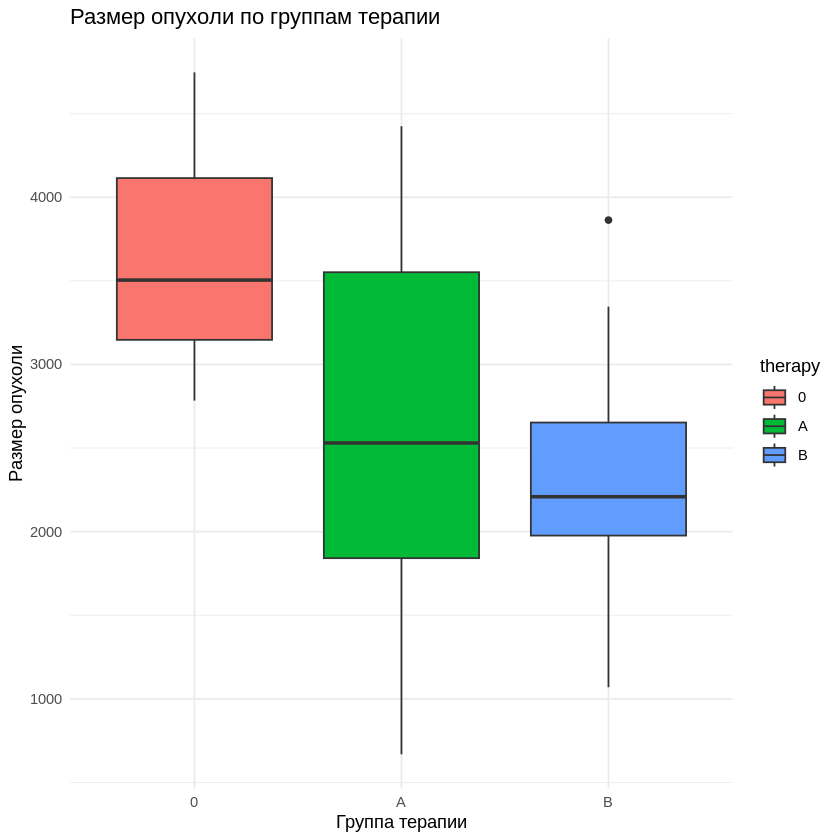

In [8]:
library(tidyverse)

# Генерация данных
tumor <- tibble(
  therapy = c(rep("0", 10), rep("A", 10), rep("B", 10)),
  value = c(rep(3213, 10), rep(2687, 10), rep(2423, 10))
) %>%
  mutate(therapy = factor(therapy, levels = c("0", "A", "B")))

# Добавляем нормально распределенный шум
set.seed(42)
tumor$value <- tumor$value + rnorm(30, 0, 760)

# Построение графиков "ящика с усами"
ggplot(tumor, aes(x = therapy, y = value, fill = therapy)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Размер опухоли по группам терапии", x = "Группа терапии", y = "Размер опухоли")


Дисперсионный анализ (ANOVA)

In [9]:
# Проведение ANOVA
anova_result <- aov(value ~ therapy, data = tumor)
summary(anova_result)


            Df   Sum Sq Mean Sq F value  Pr(>F)   
therapy      2 10038199 5019099   5.555 0.00954 **
Residuals   27 24397392  903607                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Результаты дисперсионного анализа (ANOVA) показывают следующее:

- F-значение: 5.555, что указывает на степень различия между средними значениями групп.
- P-значение (Pr(>F)): 0.00954, что меньше стандартного порога в 0.05, указывая на статистическую значимость различий между группами.

Интерпретация результатов ANOVA:

Результаты указывают на то, что существуют статистически значимые различия в размере опухолей между группами мышей, получавших разные противоопухолевые препараты и плацебо. Так как p-значение меньше 0.05, мы можем отвергнуть нулевую гипотезу о том, что нет различий в эффективности трех исследуемых методов терапии в отношении размера опухоли.

Это означает, что хотя бы один из препаратов показывает статистически значимое отличие в эффекте по сравнению с остальными группами. Однако, ANOVA не показывает, между какими именно группами существуют различия. Для определения этого необходимо провести попарные сравнения.



Попарные сравнения с использованием критерия Тьюки


In [10]:
# Попарные сравнения с использованием критерия Тьюки
tukey_result <- TukeyHSD(anova_result)
tukey_result



  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ therapy, data = tumor)

$therapy
          diff       lwr        upr     p adj
A-0 -1066.1727 -2120.206  -12.13892 0.0470127
B-0 -1341.2860 -2395.320 -287.25225 0.0105799
B-A  -275.1133 -1329.147  778.92041 0.7955378


Результаты попарных сравнений с использованием критерия Тьюки для трех групп (плацебо (0), препарат A и препарат B) по размеру опухоли представляют следующее:

а) Сравнение препарата A и плацебо (A-0):

- Разница в средних: -1066.1727
- 95% ДИ (доверительный интервал): от -2120.206 до -12.13892
- P-значение: 0.0470127

б) Сравнение препарата B и плацебо (B-0):

- Разница в средних: -1341.2860
- 95% ДИ: от -2395.320 до -287.25225
- P-значение: 0.0105799

в) Сравнение препарата B и препарата A (B-A):

- Разница в средних: -275.1133
- 95% ДИ: от -1329.147 до 778.92041
- P-значение: 0.7955378

Интерпретация результатов:

- Препарат A против Плацебо: Размер опухолей в группе, получавшей препарат A, статистически значимо меньше, чем в группе плацебо (p = 0.047). Разница в средних значима, но доверительный интервал едва не касается нуля, что указывает на граничную значимость.
- Препарат B против Плацебо: Размер опухолей в группе, получавшей препарат B, статистически значимо меньше, чем в группе плацебо (p = 0.0106), что указывает на более выраженный эффект препарата B по сравнению с плацебо.
- Препарат B против Препарата A: Статистически значимой разницы между эффективностью препаратов A и B обнаружено не было (p = 0.7955), что говорит о том, что между этими препаратами нет значимого различия в воздействии на размер опухоли.

Заключение:

Оба препарата (A и B) показали статистически значимое уменьшение размера опухолей по сравнению с плацебо, при этом препарат B демонстрирует чуть большую эффективность по сравнению с препаратом A, хотя различие между препаратами A и B не является статистически значимым. Это означает, что оба препарата могут считаться эффективными в борьбе с опухолями по сравнению с плацебо, но дополнительные исследования могут потребоваться для более точного определения различий в их эффективности.






